In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import mlgrad.regr as regr
import mlgrad.models as models
import mlgrad.inventory as inventory

In [2]:
df = pd.pandas.read_csv("data/kelly1984.csv", sep=',')
df

,heelstick,catheter
0,23.0,25.2
1,33.2,26.0
2,16.6,16.3
3,26.3,27.2
4,20.0,23.2
5,20.0,18.1
6,20.6,22.2
7,18.9,17.2
8,17.8,18.8
9,20.0,16.4


In [3]:
X = df['heelstick'].values
Y = df['catheter'].values

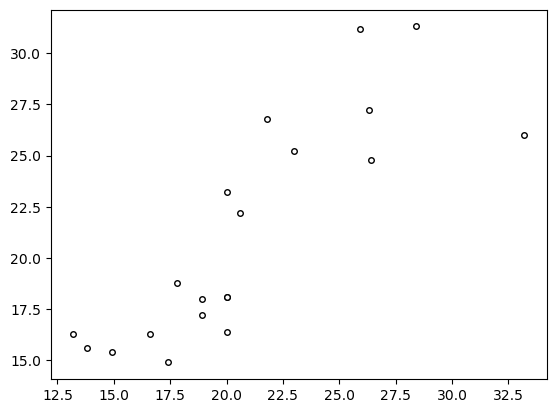

In [4]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.show()

[0.769 0.972]


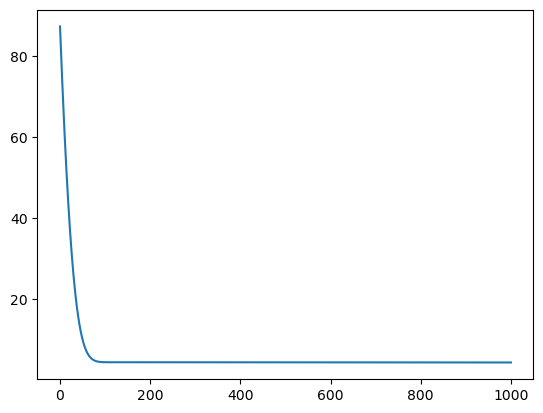

In [44]:
mod_ls = models.LinearModel(1)
regr_ls = regr.regression(X[:,None], Y, mod_ls, h=0.01)
print(np.asarray(mod_ls.param))
plt.plot(regr_ls.lvals)

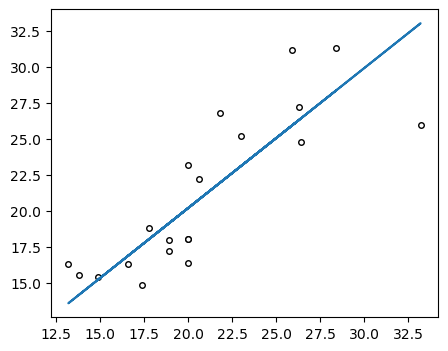

In [45]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

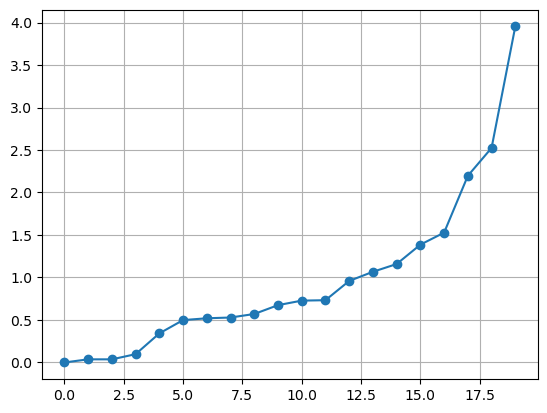

In [46]:
Y_e = mod_ls.evaluate(X[:,None])
E = abs(Y - Y_e)
Z = inventory.modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

[0.824 0.998]


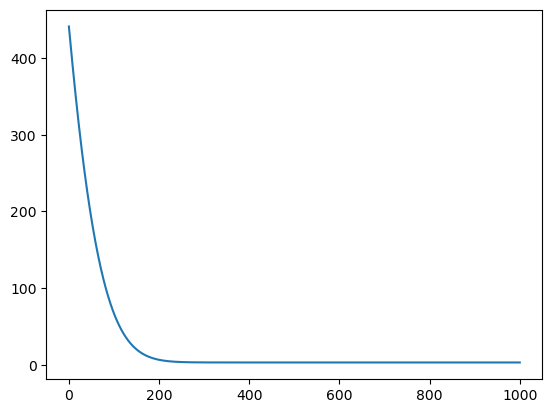

In [47]:
mod_ls1 = models.LinearModel(1)
regr_ls1 = regr.regression(X1[:,None], Y1, mod_ls1, h=0.01)
print(np.asarray(mod_ls1.param))
plt.plot(regr_ls1.lvals)

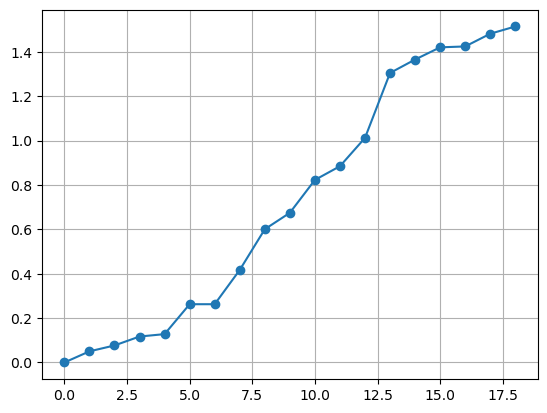

In [48]:
E1 = abs(Y1 - mod_ls1.evaluate(X1[:,None]))
Z1 = inventory.modified_zscore(E1)
plt.plot(sorted(abs(Z1)), marker='o')
plt.grid(1)
plt.show()

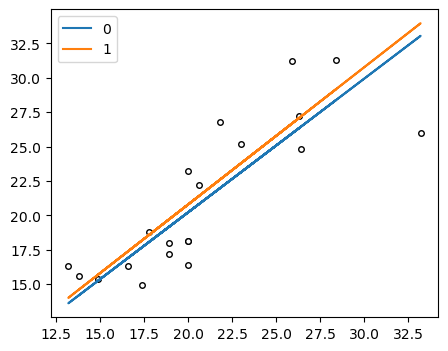

In [49]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]), label='0')
plt.plot(X, mod_ls1.evaluate(X[:,None]), label='1')
plt.legend()
plt.show()

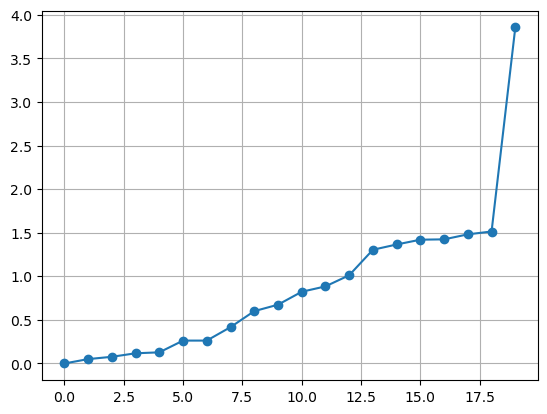

In [52]:
E1 = abs(mod_ls1.evaluate(X[:,None]) - Y)
Z1 = inventory.modified_zscore(E1)
plt.plot(sorted(abs(Z1)), marker='o')
plt.grid(1)
plt.show()